In [1]:
import os
os.environ["KERAS_BACKEND"] = "jax"
import jax
import keras

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_targets), (test_data, test_targets) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [21]:
import numpy as np
def vectorize_seq(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension), "float32")
    for i, sequence in enumerate(sequences):
        for val in sequence:
            results[i,val] = 1
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], dtype=float32)

In [19]:
y_train = np.asarray(train_targets).astype("float32")
y_test = np.asarray(test_targets).astype("float32")
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [23]:
mdl = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
mdl.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!


Metal device set to: Apple M3 Pro


W0000 00:00:1732638596.439137 36966467 mps_client.cc:510] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!
I0000 00:00:1732638596.449732 36966467 service.cc:145] XLA service 0x6000034f0a00 initialized for platform METAL (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732638596.449751 36966467 service.cc:153]   StreamExecutor device (0): Metal, <undefined>
I0000 00:00:1732638596.452285 36966467 mps_client.cc:406] Using Simple allocator.
I0000 00:00:1732638596.452292 36966467 mps_client.cc:384] XLA backend will use up to 28989243392 bytes on device 0 for SimpleAllocator.


In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
history = mdl.fit(partial_x_train, partial_y_train, epochs=20, batch_size=256, validation_data=(x_val, y_val))

Epoch 1/20


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,16]), ShapedArray(float32[16]), ShapedArray(float32[16,16]), ShapedArray(float32[16]), ShapedArray(float32[16,1]), ShapedArray(float32[1]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[10000,16]), ShapedArray(float32[16]), ShapedArray(float32[16,16]), ShapedArray(float32[16]), ShapedArray(float32[16,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"


58/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7445 - loss: 0.5586

/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,16]), ShapedArray(float32[16]), ShapedArray(float32[16,16]), ShapedArray(float32[16]), ShapedArray(float32[16,1]), ShapedArray(float32[1]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[10000,16]), ShapedArray(float32[16]), ShapedArray(float32[16,16]), ShapedArray(float32[16]), ShapedArray(float32[16,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7457 - loss: 0.5569

/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,16]), ShapedArray(float32[16]), ShapedArray(float32[16,16]), ShapedArray(float32[16]), ShapedArray(float32[16,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,16]), ShapedArray(float32[16]), ShapedArray(float32[16,16]), ShapedArray(float32[16]), ShapedArray(float32[16,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32

59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7469 - loss: 0.5553 - val_accuracy: 0.8547 - val_loss: 0.3563
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9116 - loss: 0.2651 - val_accuracy: 0.8854 - val_loss: 0.2881
Epoch 3/20
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9383 - loss: 0.1838

/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,16]), ShapedArray(float32[16]), ShapedArray(float32[16,16]), ShapedArray(float32[16]), ShapedArray(float32[16,1]), ShapedArray(float32[1]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[10000,16]), ShapedArray(float32[16]), ShapedArray(float32[16,16]), ShapedArray(float32[16]), ShapedArray(float32[16,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9376 - loss: 0.1838 - val_accuracy: 0.8841 - val_loss: 0.2929
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9565 - loss: 0.1392 - val_accuracy: 0.8670 - val_loss: 0.3372
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9671 - loss: 0.1095 - val_accuracy: 0.8796 - val_loss: 0.3143
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.0868 - val_accuracy: 0.8763 - val_loss: 0.3466
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9819 - loss: 0.0666 - val_accuracy: 0.8794 - val_loss: 0.3686
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9865 - loss: 0.0504 - val_accuracy: 0.8691 - val_loss: 0.4330
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9892 - loss: 0.0429 - val_accuracy: 0.8712 - val_loss: 0.4726
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9932 - loss: 0.0303 - val_accuracy: 0.8732 - val_loss: 0.4745
Ep

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

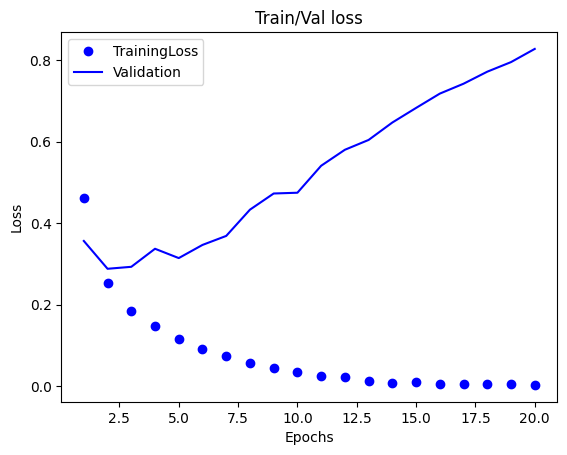

In [28]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="TrainingLoss")
plt.plot(epochs, val_loss, "b", label="Validation")
plt.title("Train/Val loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

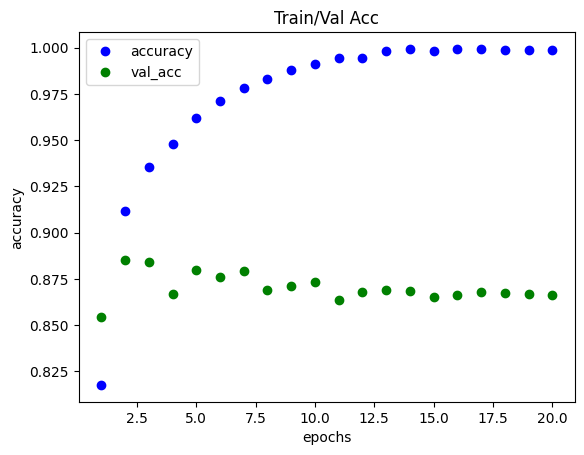

In [31]:
acc_vals = history_dict["accuracy"]
val_acc_vals = history_dict["val_accuracy"]
plt.plot(epochs, acc_vals, "bo", label="accuracy")
plt.plot(epochs, val_acc_vals, "go", label="val_acc")
plt.title("Train/Val Acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [32]:
results = mdl.evaluate(x_test, y_test)

/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,16]), ShapedArray(float32[16]), ShapedArray(float32[16,16]), ShapedArray(float32[16]), ShapedArray(float32[16,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"


772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.8494 - loss: 0.9217

/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,16]), ShapedArray(float32[16]), ShapedArray(float32[16,16]), ShapedArray(float32[16]), ShapedArray(float32[16,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8494 - loss: 0.9215


In [33]:
results

[0.9080514907836914, 0.8521999716758728]

In [39]:
import numpy as np
pred = mdl.predict(x_test)
np.set_printoptions(suppress=True)
print(pred)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
[[0.00113758]
 [1.        ]
 [0.84295267]
 ...
 [0.00018034]
 [0.00078396]
 [0.93659663]]


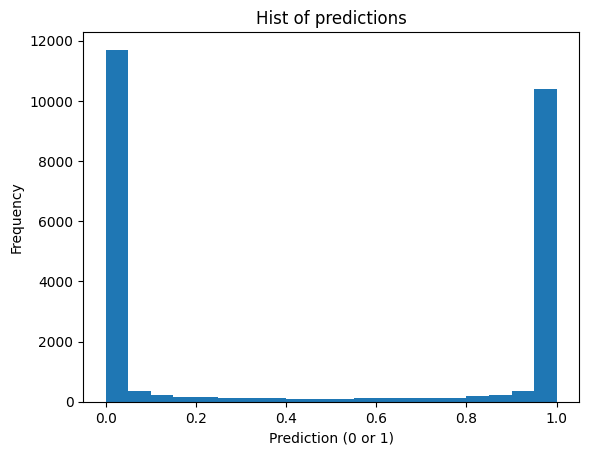

In [40]:
plt.hist(pred, bins=20, range=(0,1))
plt.xlabel("Prediction (0 or 1)")
plt.ylabel("Frequency")
plt.title("Hist of predictions")
plt.show()

In [ ]:
careful_model = keras.models.clone_model(mdl)
careful_model.compile()
careful_model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=256, validation_data=(x_val, y_val))